#### import data and scripts

In [1]:
import os
import sys
sys.path.append('C:/Users/user/Documents/Code/Studing-Machine-Learning/Studing-Machine-Learning-book1/scripts')

import pandas as pd

from perceptron import Perceptron


In [2]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### test perceptron

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# made binary the tada
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa',-1, 1)

# extract sepal lenght and petal lenght
X = df.iloc[0:100, [0,2]].values

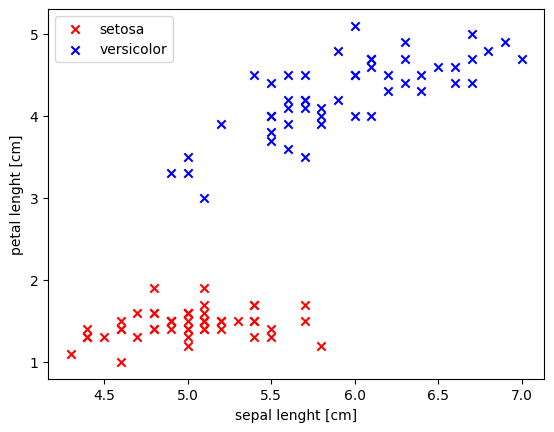

In [5]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='x', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor') # manual cuts 0:50 and 50:100
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')
plt.show()

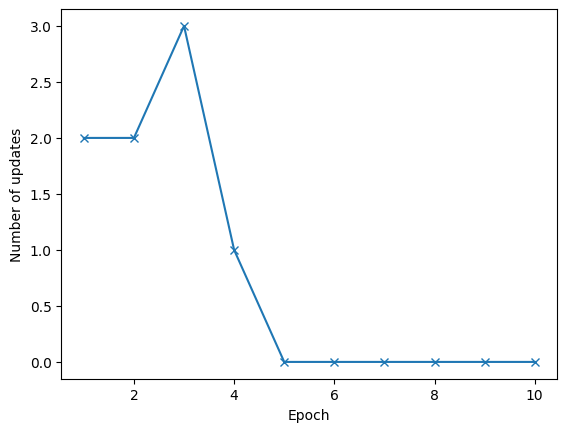

In [6]:
# train perceptron
ppn = Perceptron(eta=0.001, niter=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='x')
plt.xlabel('Epoch')
plt.ylabel('Number of updates')
plt.show()


In [7]:
ppn.w_ #the petal's length is the most important feature to clasificate the tipology of flower

array([ 0.00096714, -0.00998264,  0.02067689])

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

C:\Users\user\AppData\Local\Temp\ipykernel_16228\1277464609.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


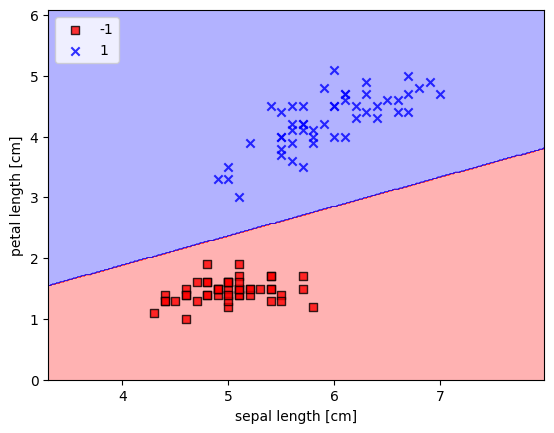

In [9]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

### Adaptative linear neurons and the convergence of learning -- Adaline

Cost ada1 =  [49.17525451706798, 1800.868528929978, 2805099.96701081, 4376639945.0674515, 6828631707271.907, 1.0654340225803868e+16, 1.6623383792442761e+19, 2.593655569976874e+22, 4.0467387985894185e+25, 6.313905012512879e+28]
Cost ada2 =  [49.17525451706798, 47.43451549869588, 46.19643705772974, 45.1499363295429, 44.184583518714376, 43.26099171497429, 42.3649314119127, 41.491085726553784, 40.6372991923052, 39.80254154972328]


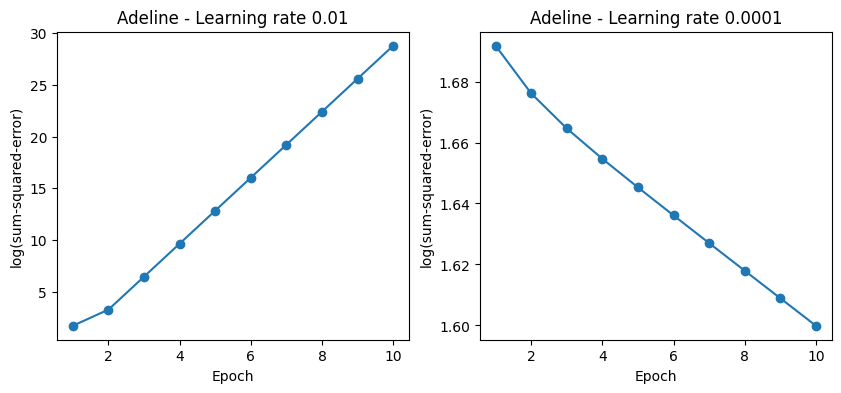

In [10]:
sys.path.append('C:/Users/user/Documents/Code/Studing-Machine-Learning/Studing-Machine-Learning-book1/scripts/obsolet-version')
from adalinegd import AdalineGD

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
print('Cost ada1 = ', ada1.cost_)
ax[0].plot(range(1,len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('log(sum-squared-error)')
ax[0].set_title('Adeline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
print('Cost ada2 = ', ada2.cost_)
ax[1].plot(range(1,len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('log(sum-squared-error)')
ax[1].set_title('Adeline - Learning rate 0.0001')

plt.show()

### Standarization
-> just z normal transformation
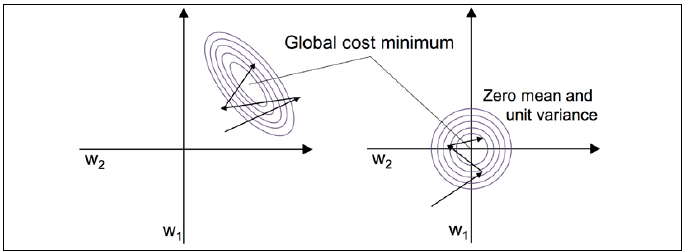

In [11]:
# feature standarization
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean())/X_std[:,0].std() 
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean())/X_std[:,1].std() 

In [19]:
# Retrain
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)
print('Cost ada_gd = ', ada_gd.cost_)

Cost ada_gd =  [49.475166817142245, 33.479714624914436, 22.92391045175778, 15.957330542152597, 11.359553353339834, 8.325129668796869, 6.322482146050594, 5.000782371298836, 4.128491928403879, 3.5528009649180206, 3.1728586095491367, 2.9221056838315524, 2.7566147116684667, 2.6473946027141713, 2.5753119262752873]


C:\Users\user\AppData\Local\Temp\ipykernel_16228\1277464609.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


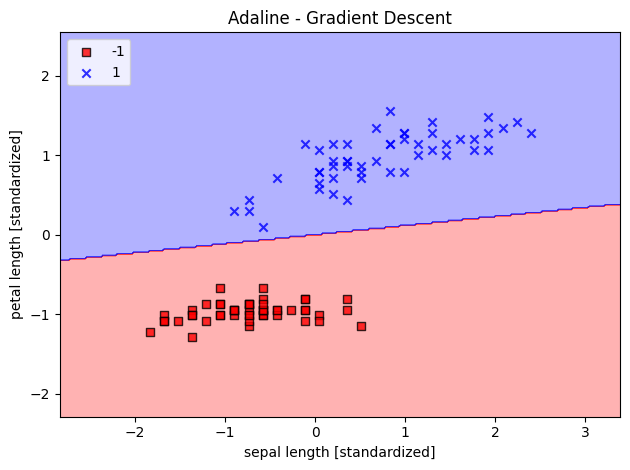

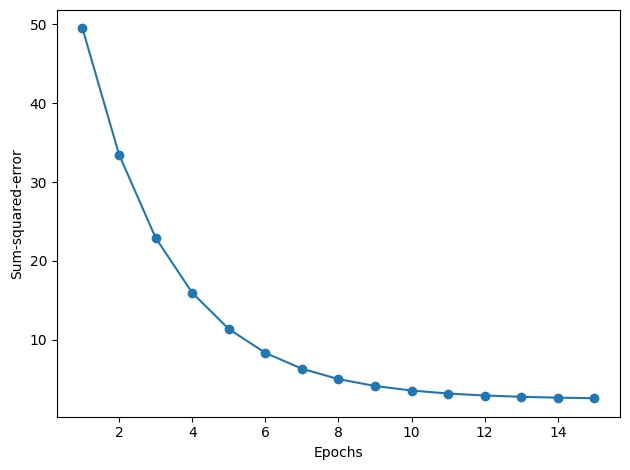

In [20]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

### Large-Scale machine learning and stochastic gradient descent

In [14]:
from adalinesgd import AdalineSGD

In [22]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=42)
ada_sgd.fit(X_std, y)
print('Cost ada_sgd = ', ada_sgd.cost_)

Cost ada_sgd =  [0.1987001105512993, 0.07139750547740849, 0.054888440000673396, 0.04555856247835914, 0.03826249192340443, 0.034552383081273036, 0.031419756201701315, 0.029376819572171704, 0.027908456172567906, 0.026948920995749276, 0.02630512447877158, 0.025819491071229363, 0.0255707027249048, 0.02530764458165424, 0.025039767324673185]


C:\Users\user\AppData\Local\Temp\ipykernel_16228\1277464609.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


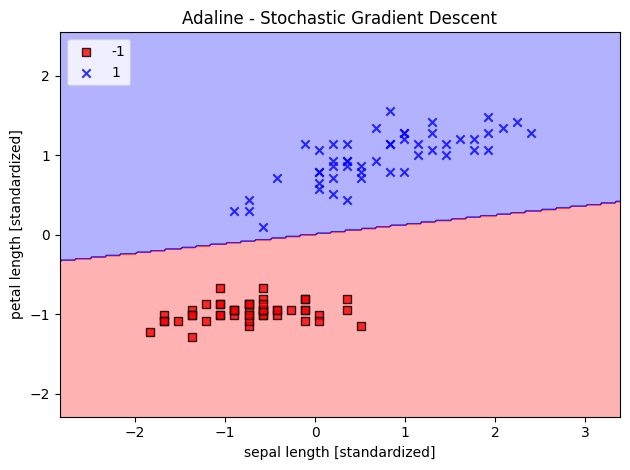

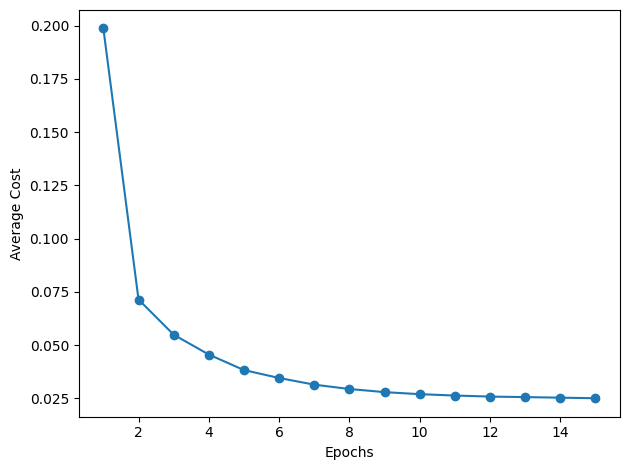

In [16]:
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()